# ***SIFT Based Approach***
This Approach basically uses SIFT , using internal computer vision libarary function calls and based on those we can calculate similarity based on features extracted through SIFT.

Comparing two Fashion MNIST images
Number of Matches: 2
Similarity Score: 66.67%


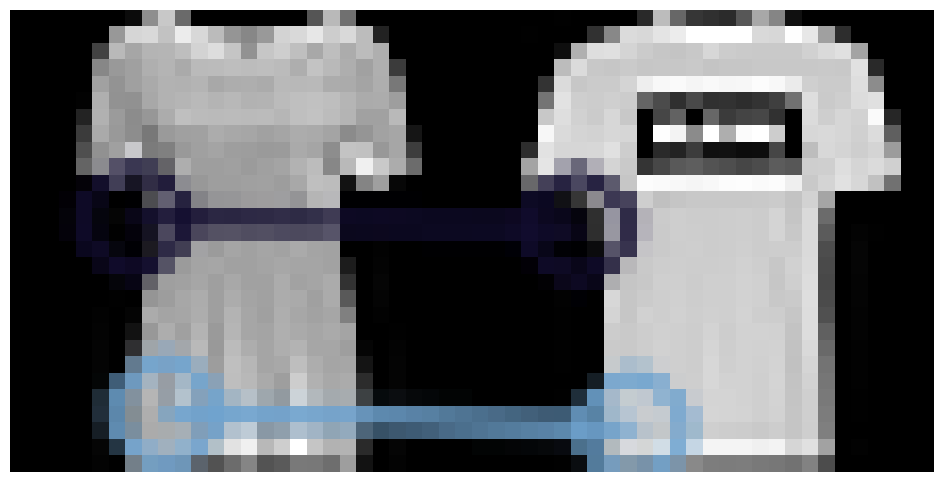

Comparing two Fashion MNIST images
Number of Matches: 1
Similarity Score: 20.00%


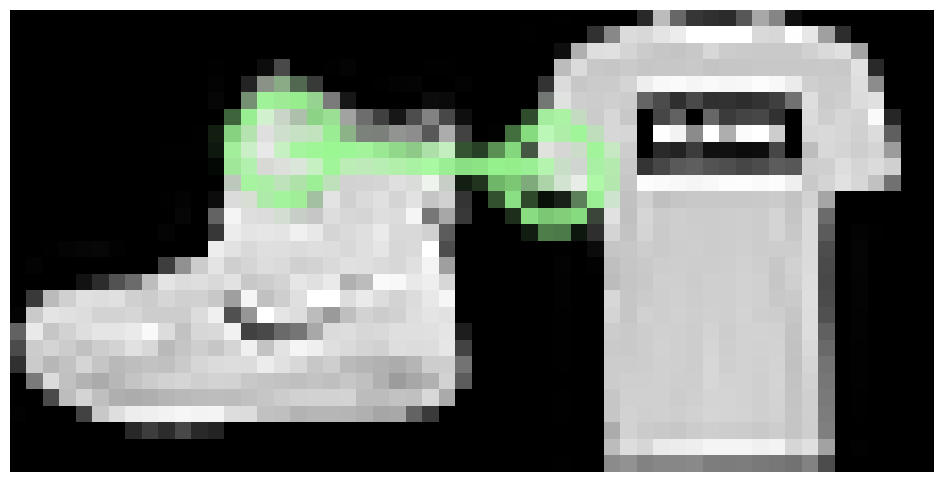

Comparing two Fashion MNIST images
Number of Matches: 3
Similarity Score: 100.00%


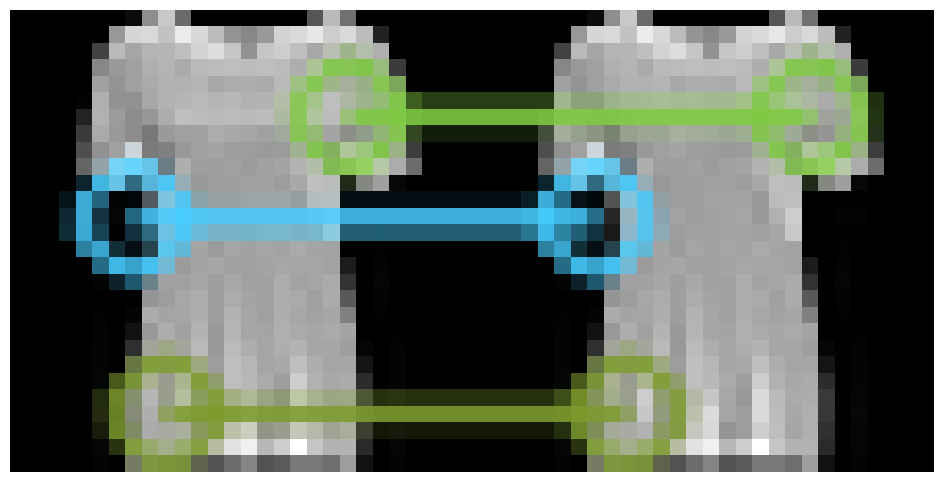

In [ ]:
import cv2
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST

# Function to resize images for uniform dimensions
def imageResize(image, maxD=1024):
    height, width = image.shape[:2]
    aspectRatio = width / height
    if aspectRatio < 1:
        newSize = (int(maxD * aspectRatio), maxD)
    else:
        newSize = (maxD, int(maxD / aspectRatio))
    return cv2.resize(image, newSize)

# SIFT initialization
sift = cv2.SIFT_create()

# Compute SIFT keypoints and descriptors
def computeSIFT(image):
    return sift.detectAndCompute(image, None)

# Match descriptors using BFMatcher with KNN
def calculateMatches(des1, des2):
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)
    return good_matches

# Calculate similarity score
def calculateScore(matches, keypoints1, keypoints2):
    return 100 * (len(matches) / min(len(keypoints1), len(keypoints2)))

# Plot matches between two images
def plotMatches(image1, image2, keypoints1, keypoints2, matches):
    matchPlot = cv2.drawMatches(
        image1, keypoints1, image2, keypoints2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )
    plt.figure(figsize=(12, 6))
    plt.imshow(matchPlot, cmap="gray")
    plt.axis('off')
    plt.show()

# Main function to compare two images
def compareFashionMNISTImages(image1, image2):
    print("Comparing two Fashion MNIST images")

    # Compute SIFT keypoints and descriptors
    keypoints1, descriptors1 = computeSIFT(image1)
    keypoints2, descriptors2 = computeSIFT(image2)

    # Match descriptors
    matches = calculateMatches(descriptors1, descriptors2)

    # Calculate similarity score
    score = calculateScore(matches, keypoints1, keypoints2)

    # Display results
    print(f"Number of Matches: {len(matches)}")
    print(f"Similarity Score: {score:.2f}%")
    plotMatches(image1, image2, keypoints1, keypoints2, matches)

# Load Fashion MNIST dataset
def loadFashionMNISTSamples():
    transform = transforms.ToTensor()
    fashion_mnist = FashionMNIST(root="./data", train=True, download=True, transform=transform)
    #Loading Images from same class but not exactly the same
    image1, _ = fashion_mnist[10]  # Load the first image
    image2, _ = fashion_mnist[1]  # Load the second image
    #Loading Images from different classes
    image3, _ = fashion_mnist[0]  # Load the first image
    image4, _ = fashion_mnist[1]  # Load the second image
    #Loading exact same images.
    image5, _ = fashion_mnist[10]  # Load the first image
    image6, _ = fashion_mnist[10]  # Load the second image
    return (image1.squeeze().numpy() * 255).astype("uint8"), (image2.squeeze().numpy() * 255).astype("uint8"), (image3.squeeze().numpy() * 255).astype("uint8"), (image4.squeeze().numpy() * 255).astype("uint8"), (image5.squeeze().numpy() * 255).astype("uint8"), (image6.squeeze().numpy() * 255).astype("uint8")

# Example Usage
image1, image2, image3, image4, image5, image6 = loadFashionMNISTSamples()
compareFashionMNISTImages(image1, image2)
compareFashionMNISTImages(image3, image4)
compareFashionMNISTImages(image5, image6)


Here we are taking one image from each class and then calculating sift similarity with images from random images taken from within the class and inter class images.


Comparing T-shirt/top with random samples:


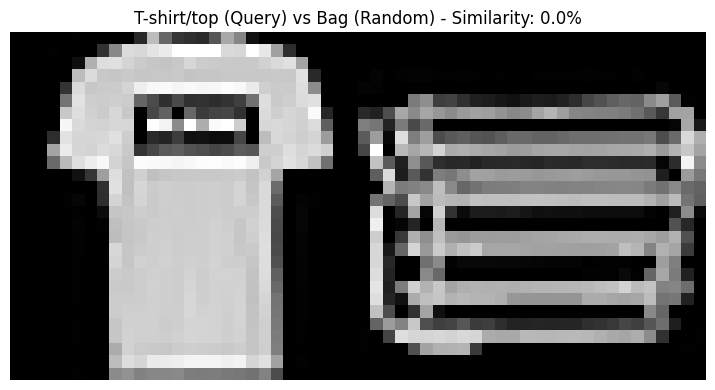

Sample 1: Bag - Similarity Score: 0.0%


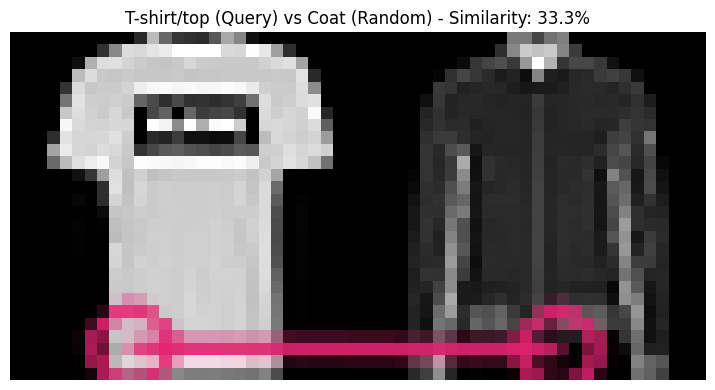

Sample 2: Coat - Similarity Score: 33.3%


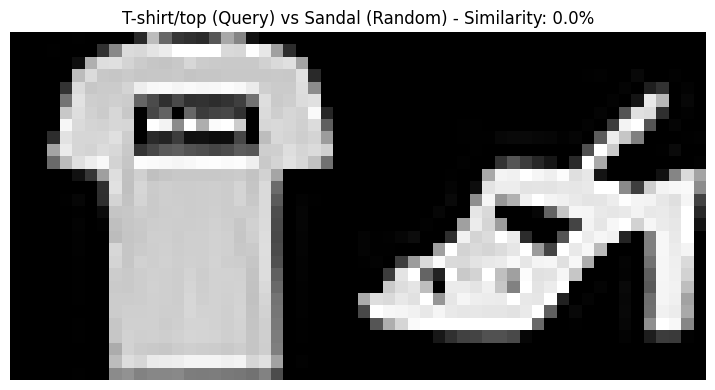

Sample 3: Sandal - Similarity Score: 0.0%


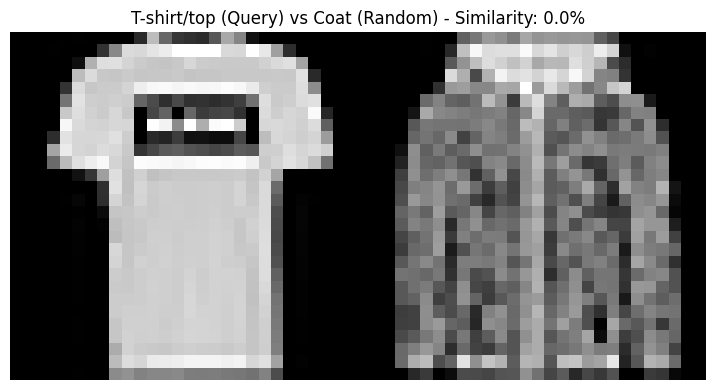

Sample 4: Coat - Similarity Score: 0.0%


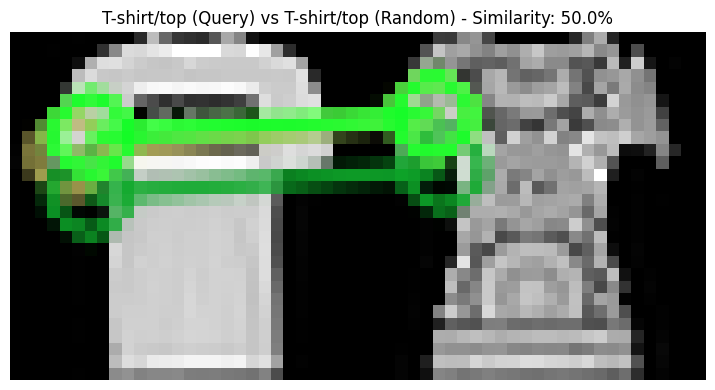

Sample 5: T-shirt/top - Similarity Score: 50.0%


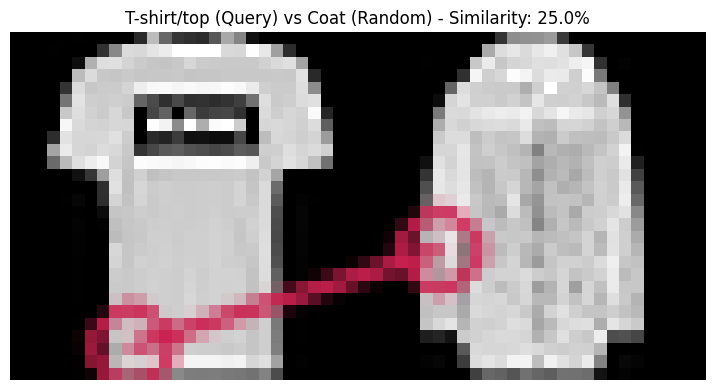

Sample 6: Coat - Similarity Score: 25.0%


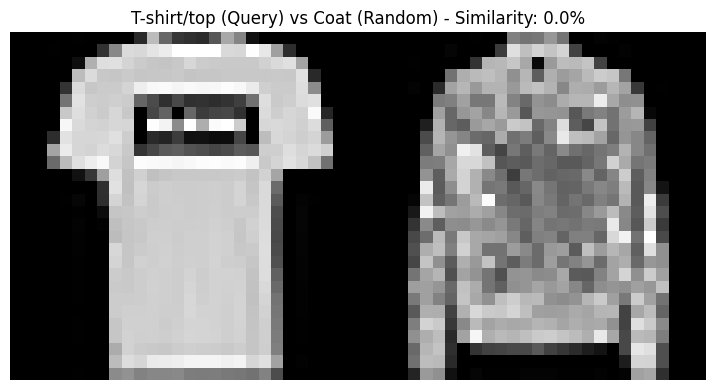

Sample 7: Coat - Similarity Score: 0.0%


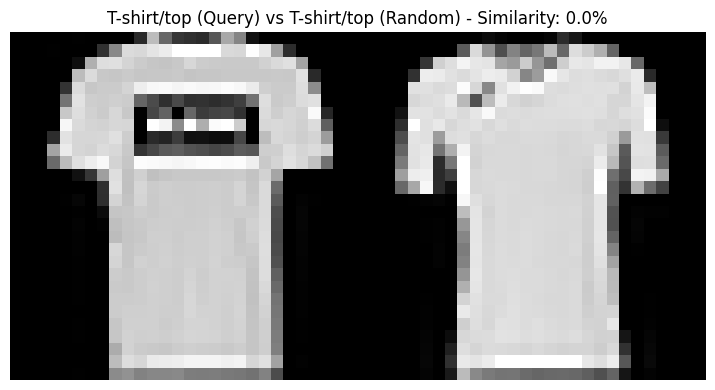

Sample 8: T-shirt/top - Similarity Score: 0.0%


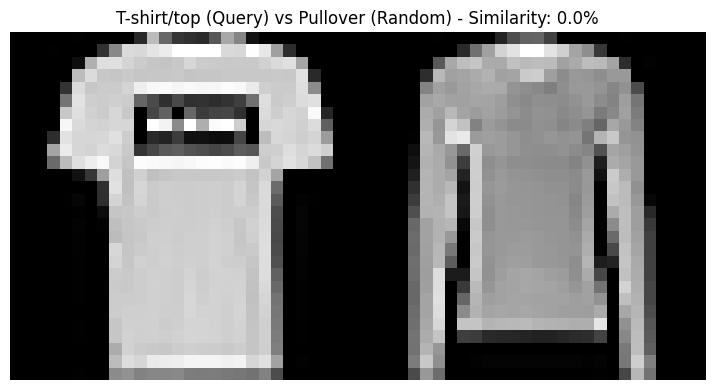

Sample 9: Pullover - Similarity Score: 0.0%


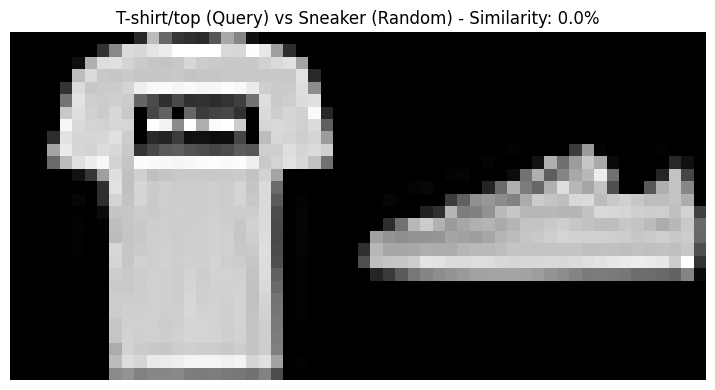

Sample 10: Sneaker - Similarity Score: 0.0%
--------------------------------------------------

Comparing Trouser with random samples:


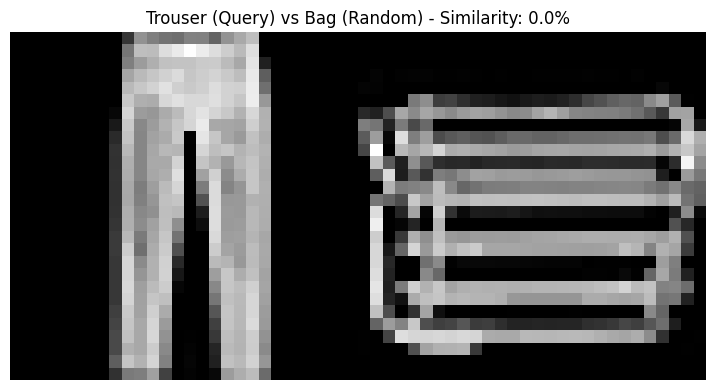

Sample 1: Bag - Similarity Score: 0.0%


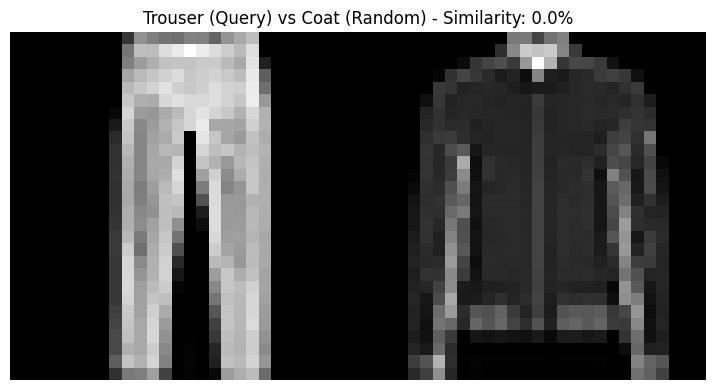

Sample 2: Coat - Similarity Score: 0.0%


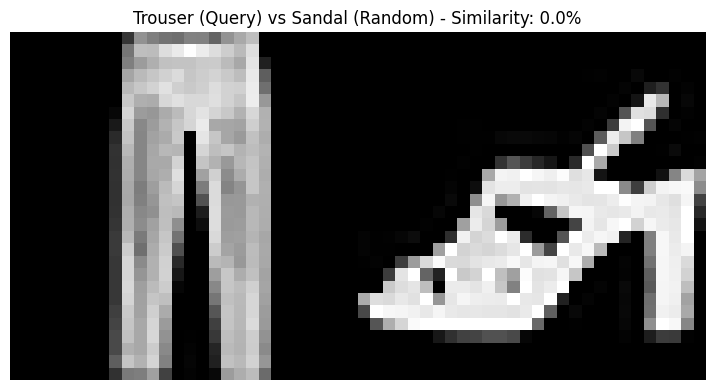

Sample 3: Sandal - Similarity Score: 0.0%


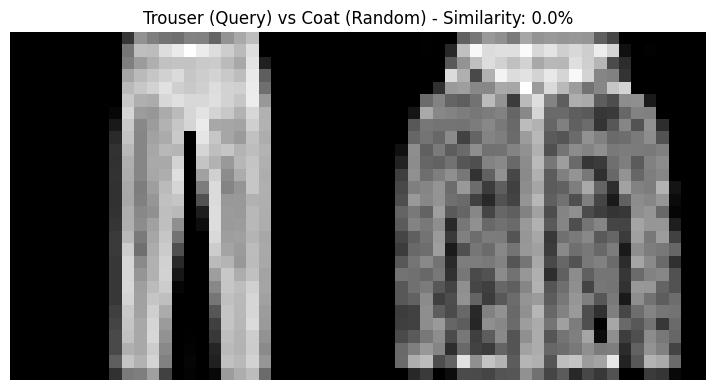

Sample 4: Coat - Similarity Score: 0.0%


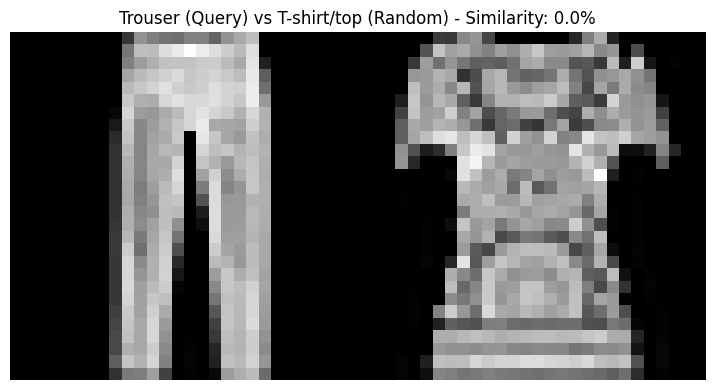

Sample 5: T-shirt/top - Similarity Score: 0.0%


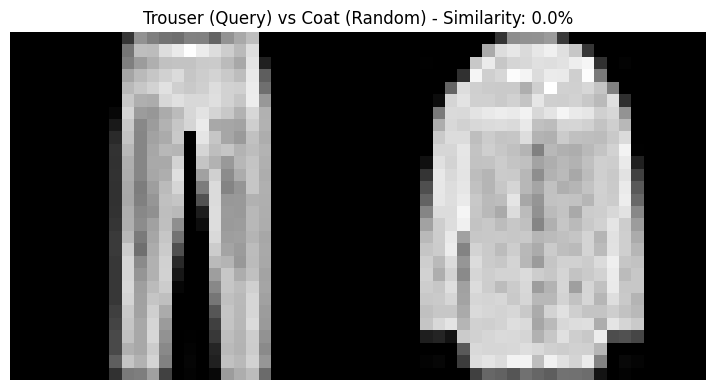

Sample 6: Coat - Similarity Score: 0.0%


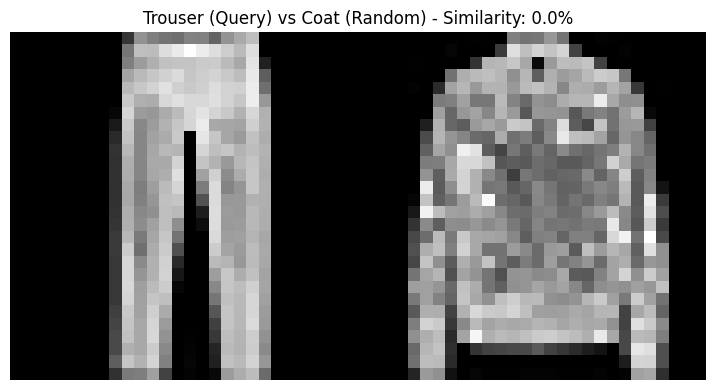

Sample 7: Coat - Similarity Score: 0.0%


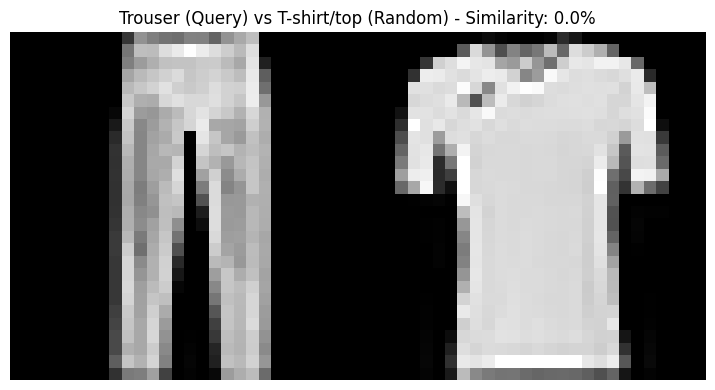

Sample 8: T-shirt/top - Similarity Score: 0.0%


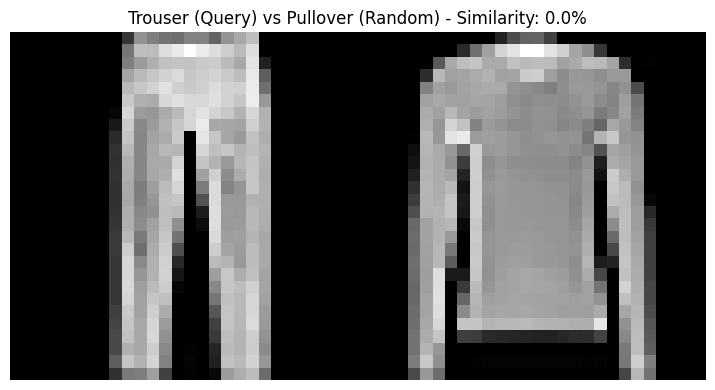

Sample 9: Pullover - Similarity Score: 0.0%


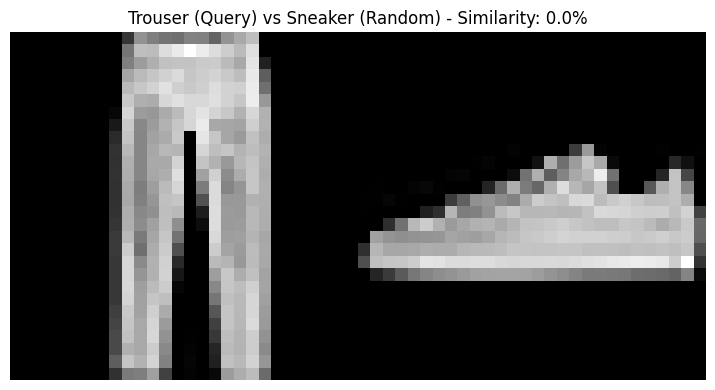

Sample 10: Sneaker - Similarity Score: 0.0%
--------------------------------------------------

Comparing Pullover with random samples:


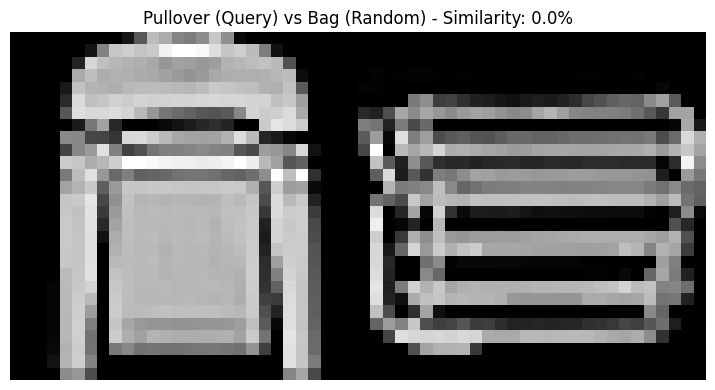

Sample 1: Bag - Similarity Score: 0.0%


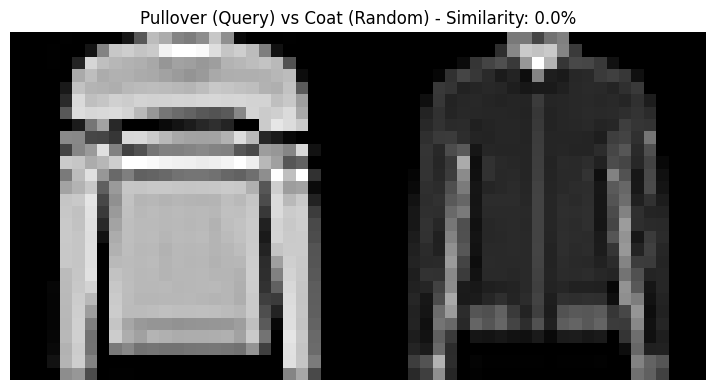

Sample 2: Coat - Similarity Score: 0.0%


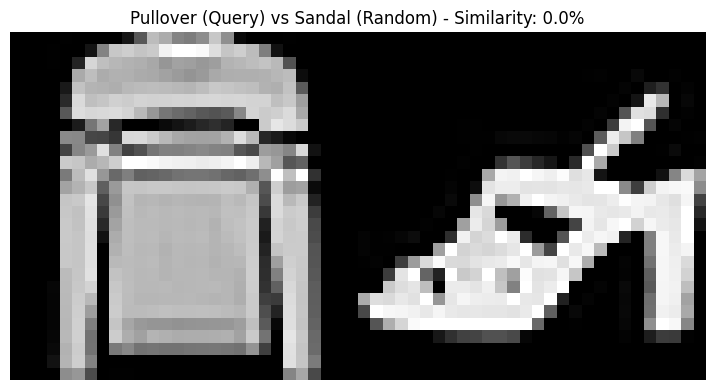

Sample 3: Sandal - Similarity Score: 0.0%


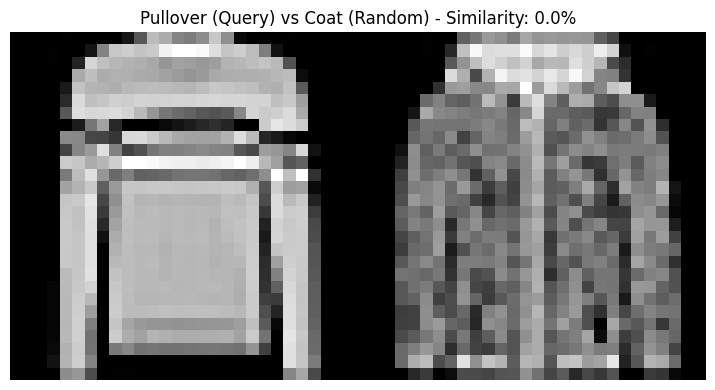

Sample 4: Coat - Similarity Score: 0.0%


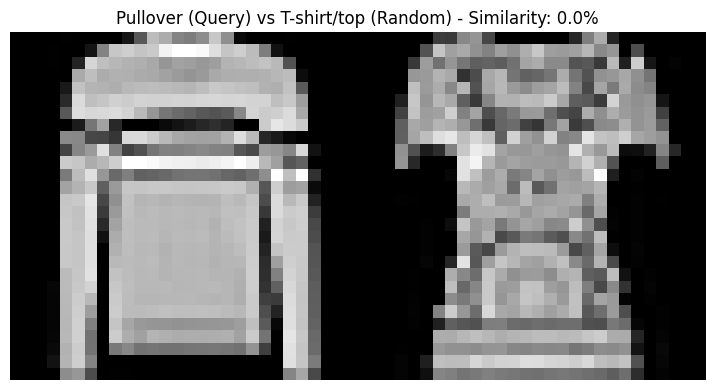

Sample 5: T-shirt/top - Similarity Score: 0.0%


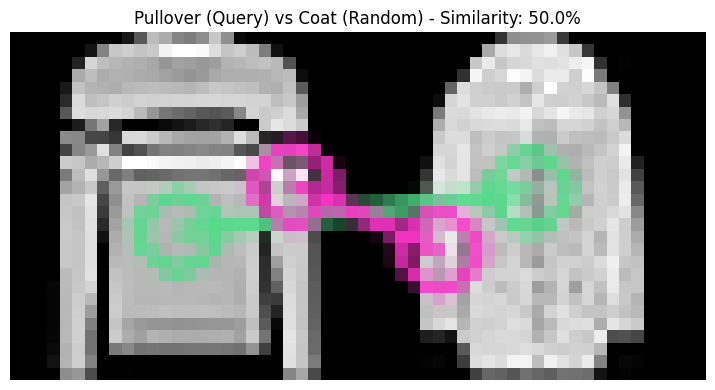

Sample 6: Coat - Similarity Score: 50.0%


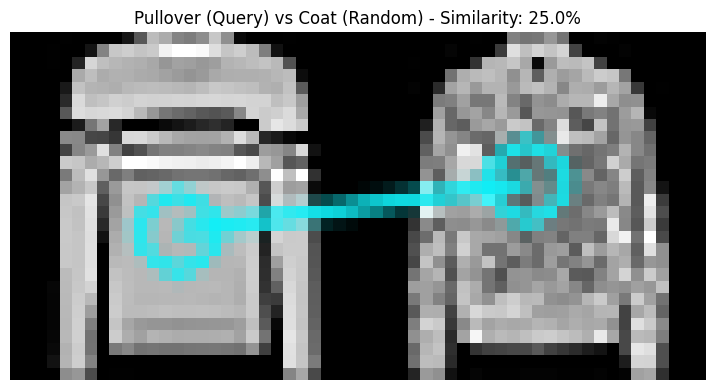

Sample 7: Coat - Similarity Score: 25.0%


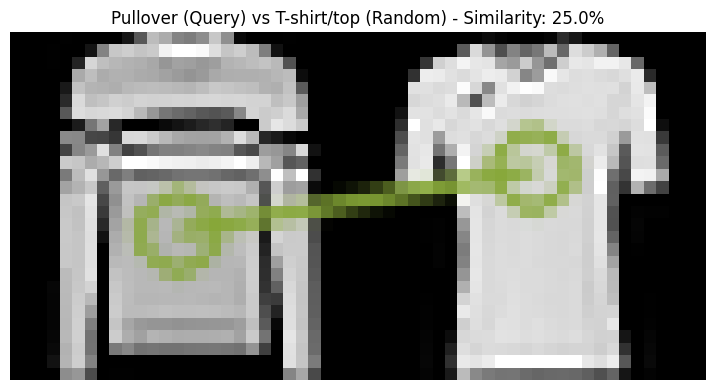

Sample 8: T-shirt/top - Similarity Score: 25.0%


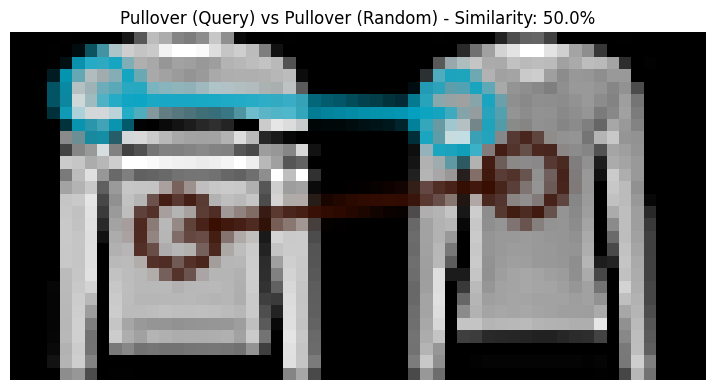

Sample 9: Pullover - Similarity Score: 50.0%


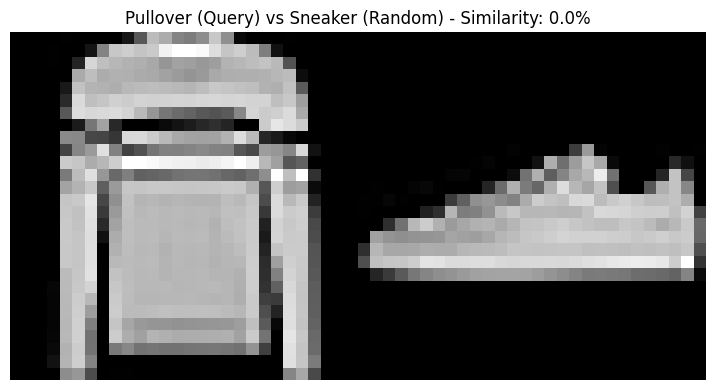

Sample 10: Sneaker - Similarity Score: 0.0%
--------------------------------------------------

Comparing Dress with random samples:


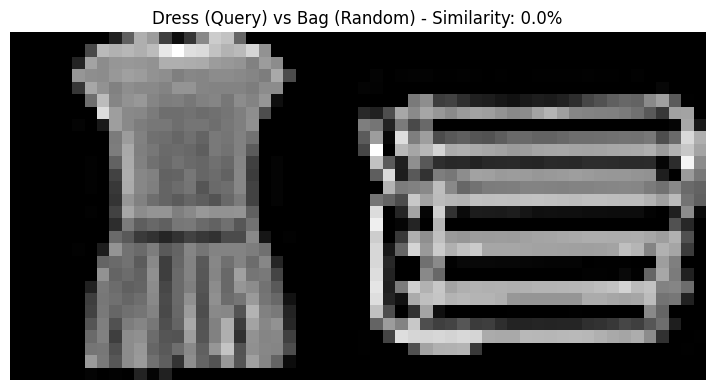

Sample 1: Bag - Similarity Score: 0.0%


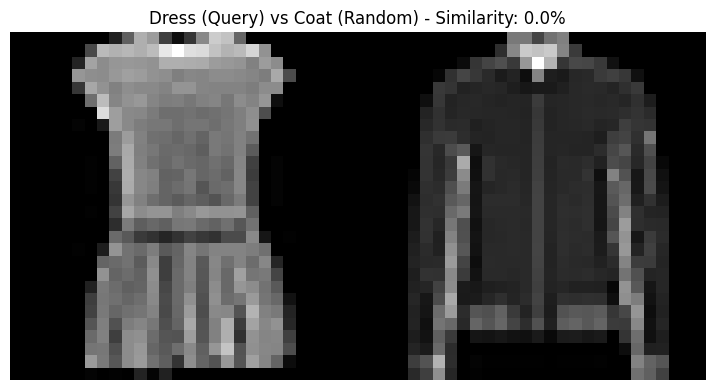

Sample 2: Coat - Similarity Score: 0.0%


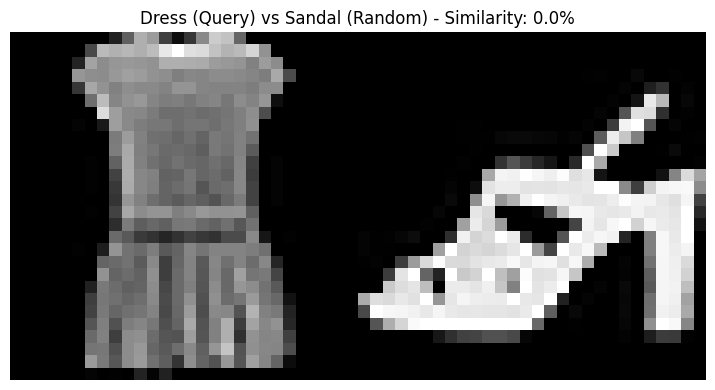

Sample 3: Sandal - Similarity Score: 0.0%


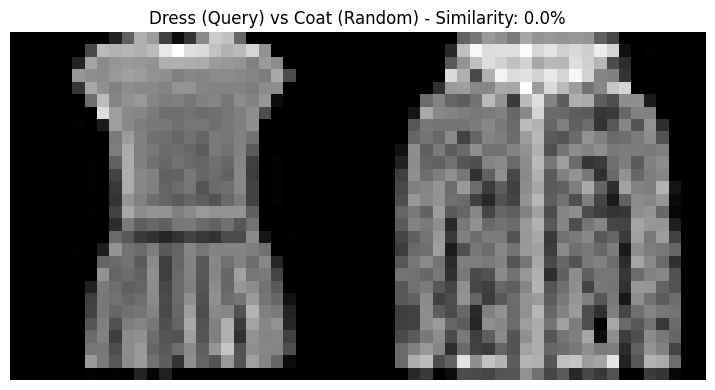

Sample 4: Coat - Similarity Score: 0.0%


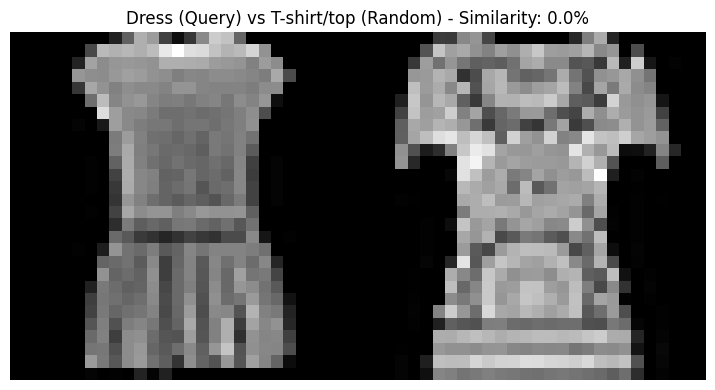

Sample 5: T-shirt/top - Similarity Score: 0.0%


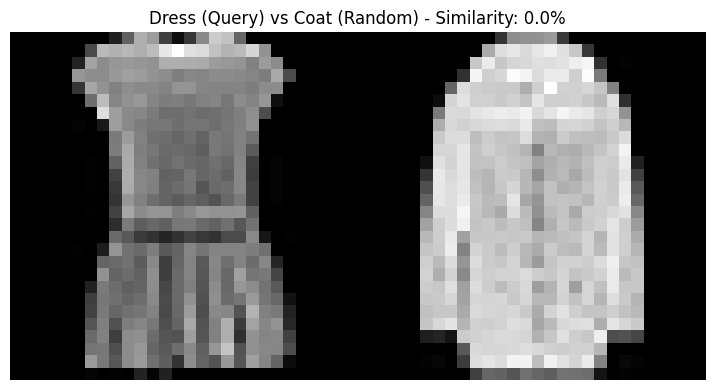

Sample 6: Coat - Similarity Score: 0.0%


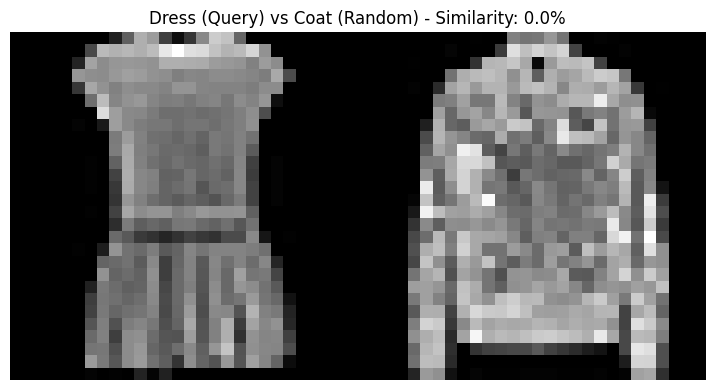

Sample 7: Coat - Similarity Score: 0.0%


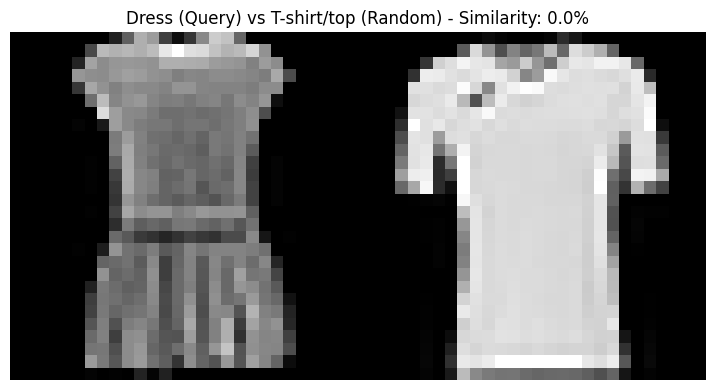

Sample 8: T-shirt/top - Similarity Score: 0.0%


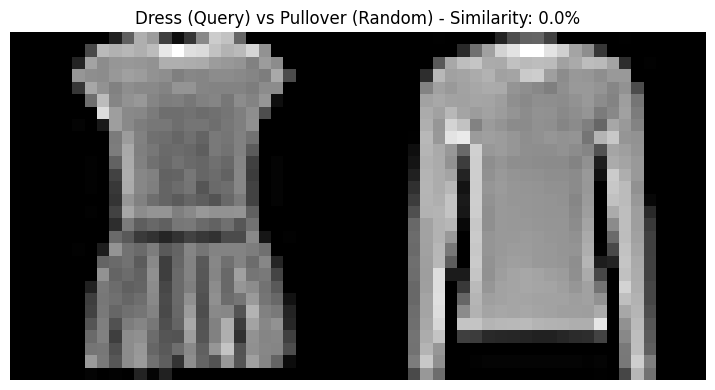

Sample 9: Pullover - Similarity Score: 0.0%


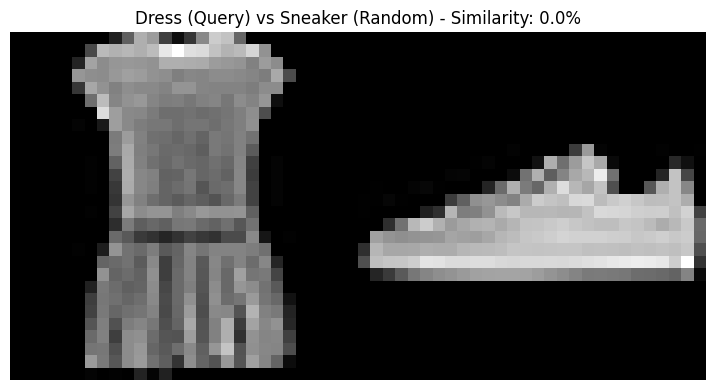

Sample 10: Sneaker - Similarity Score: 0.0%
--------------------------------------------------

Comparing Coat with random samples:


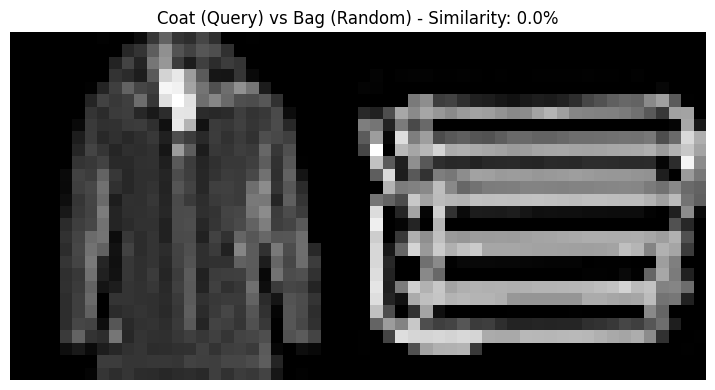

Sample 1: Bag - Similarity Score: 0.0%


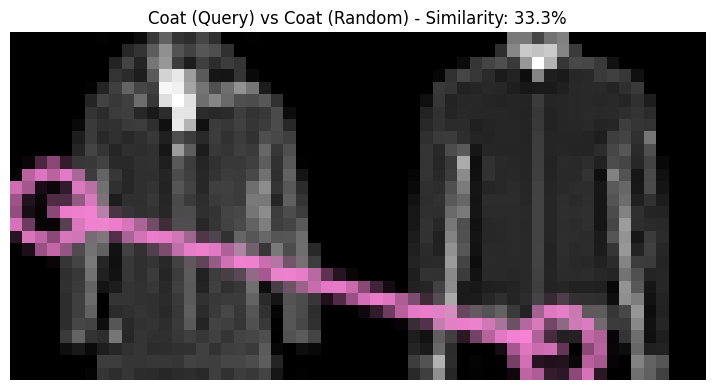

Sample 2: Coat - Similarity Score: 33.3%


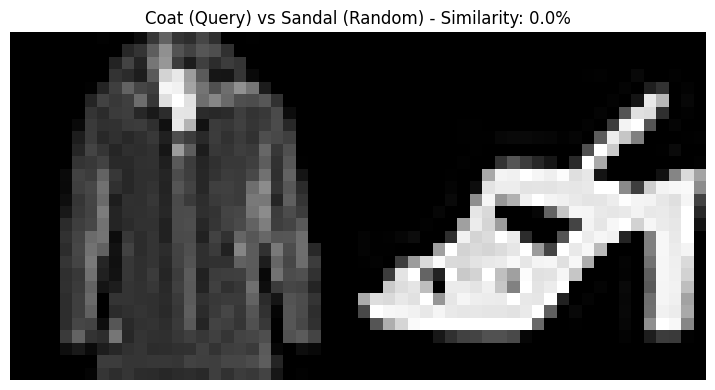

Sample 3: Sandal - Similarity Score: 0.0%


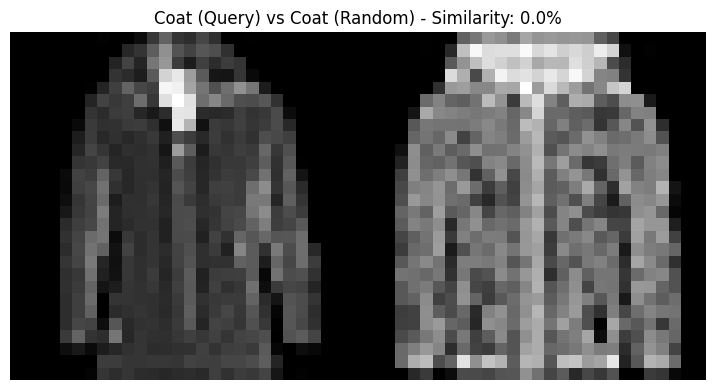

Sample 4: Coat - Similarity Score: 0.0%


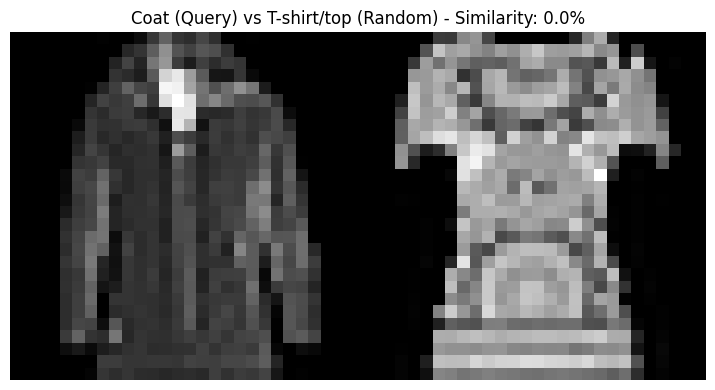

Sample 5: T-shirt/top - Similarity Score: 0.0%


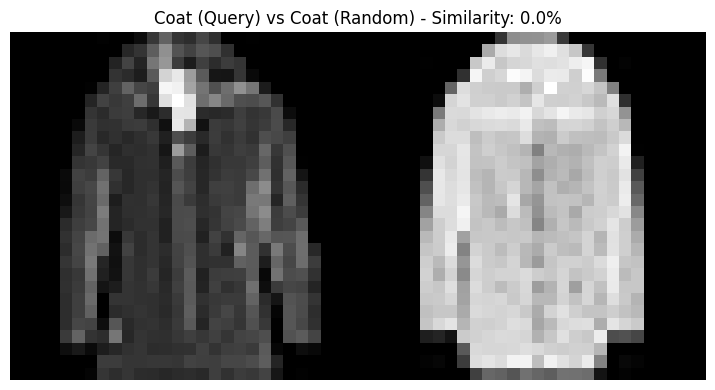

Sample 6: Coat - Similarity Score: 0.0%


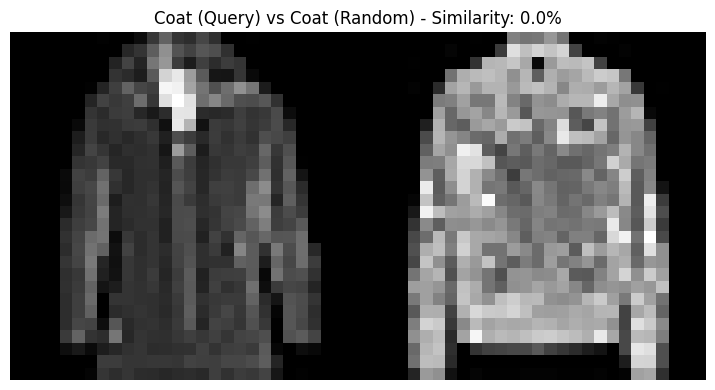

Sample 7: Coat - Similarity Score: 0.0%


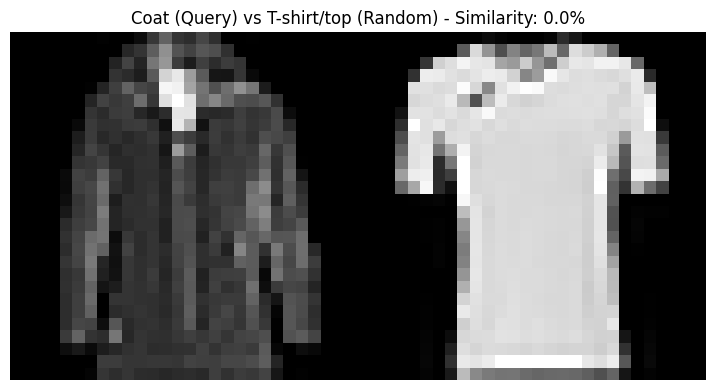

Sample 8: T-shirt/top - Similarity Score: 0.0%


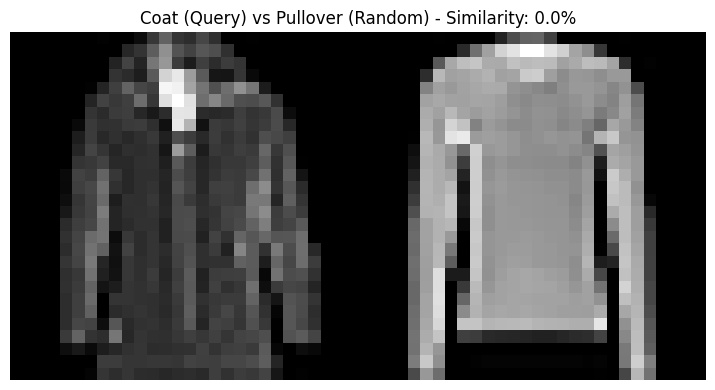

Sample 9: Pullover - Similarity Score: 0.0%


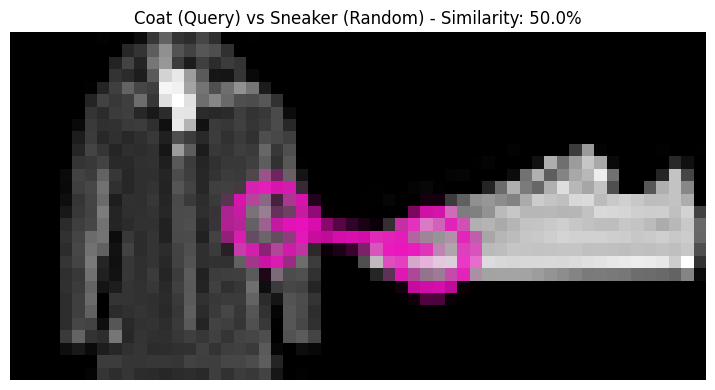

Sample 10: Sneaker - Similarity Score: 50.0%
--------------------------------------------------

Comparing Sandal with random samples:


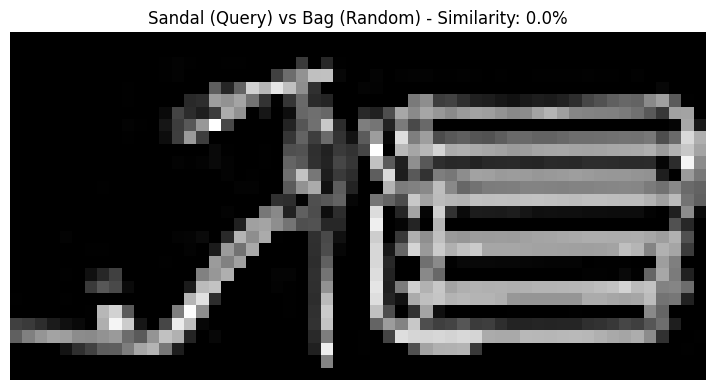

Sample 1: Bag - Similarity Score: 0.0%


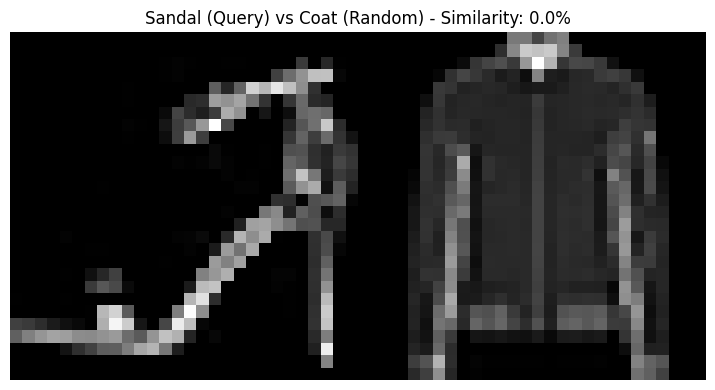

Sample 2: Coat - Similarity Score: 0.0%


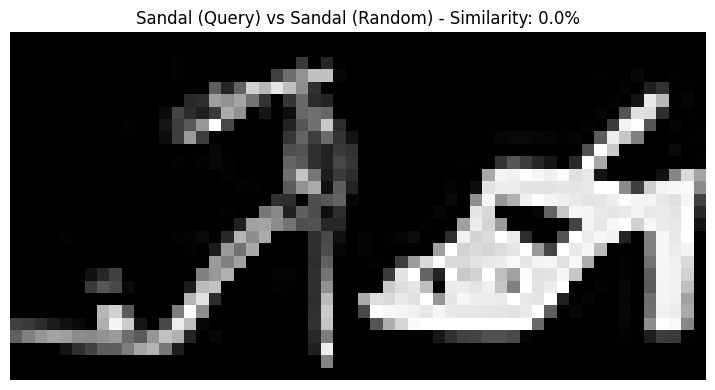

Sample 3: Sandal - Similarity Score: 0.0%


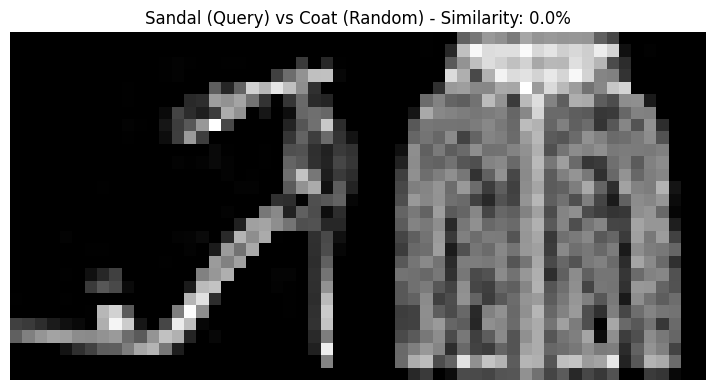

Sample 4: Coat - Similarity Score: 0.0%


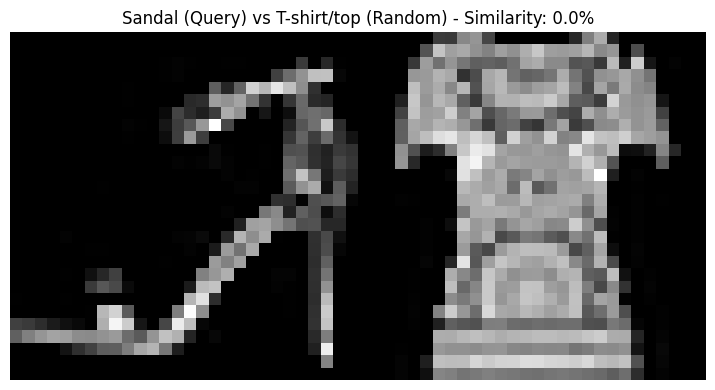

Sample 5: T-shirt/top - Similarity Score: 0.0%


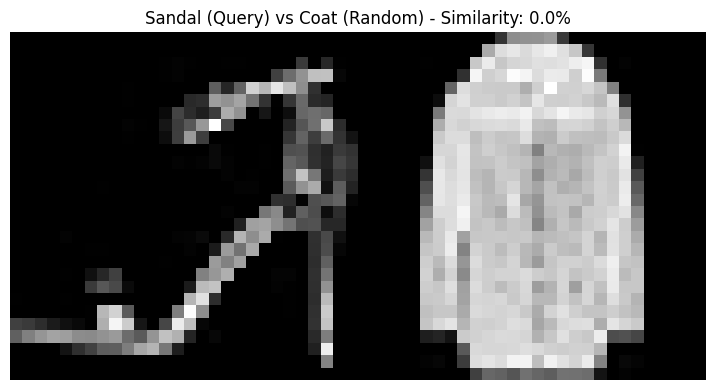

Sample 6: Coat - Similarity Score: 0.0%


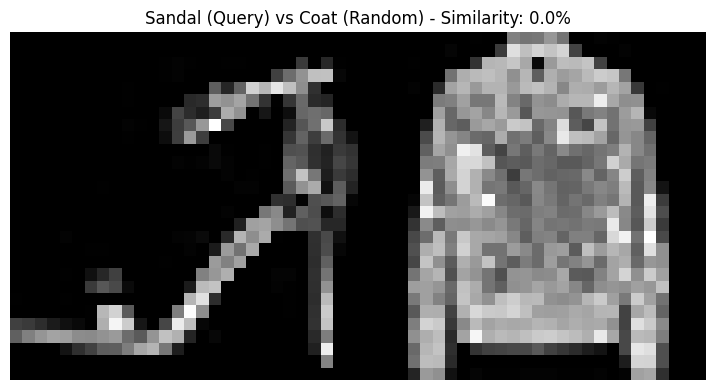

Sample 7: Coat - Similarity Score: 0.0%


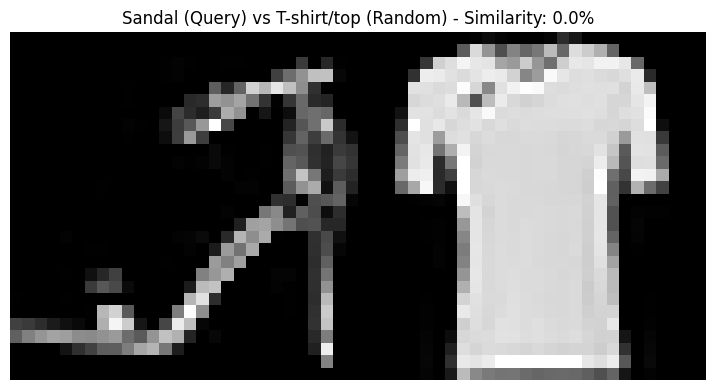

Sample 8: T-shirt/top - Similarity Score: 0.0%


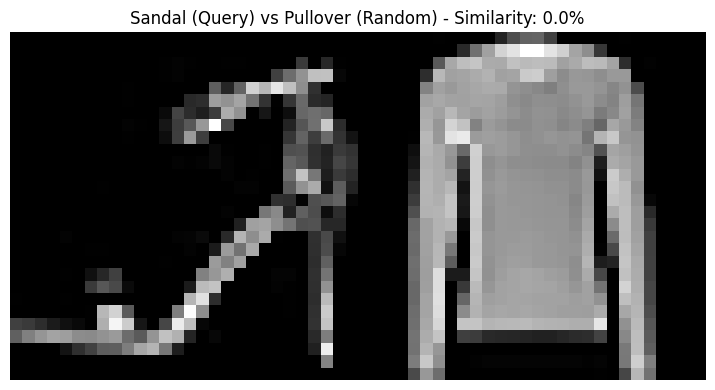

Sample 9: Pullover - Similarity Score: 0.0%


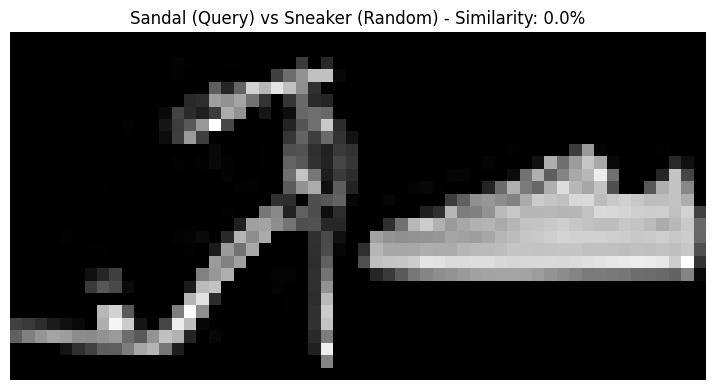

Sample 10: Sneaker - Similarity Score: 0.0%
--------------------------------------------------

Comparing Shirt with random samples:


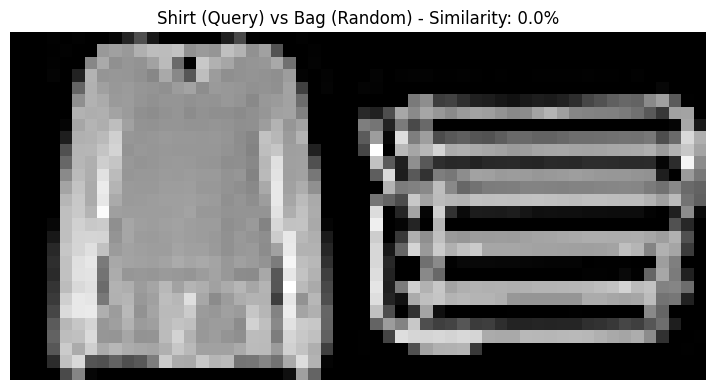

Sample 1: Bag - Similarity Score: 0.0%


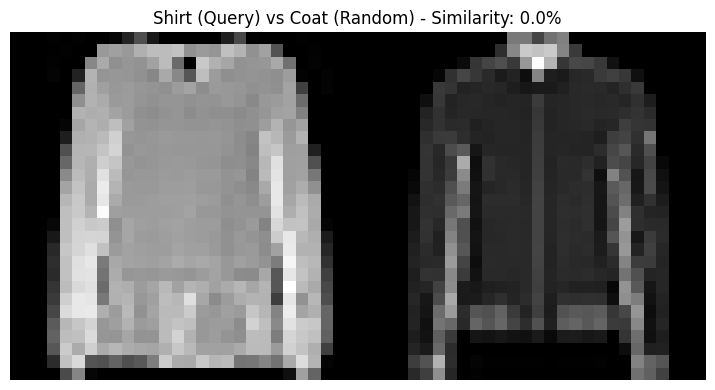

Sample 2: Coat - Similarity Score: 0.0%


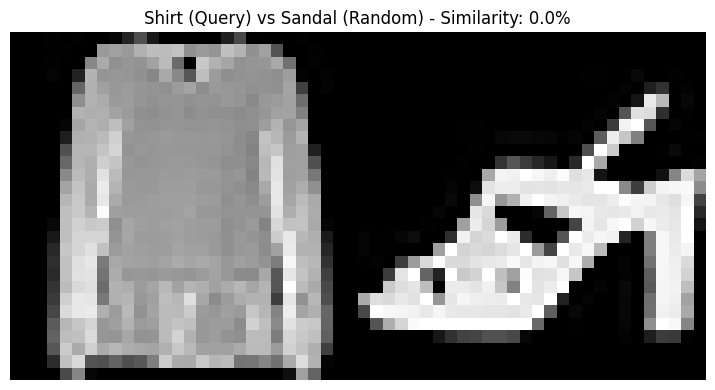

Sample 3: Sandal - Similarity Score: 0.0%


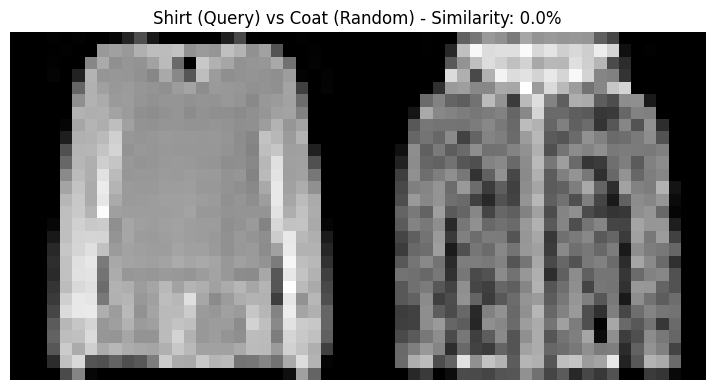

Sample 4: Coat - Similarity Score: 0.0%


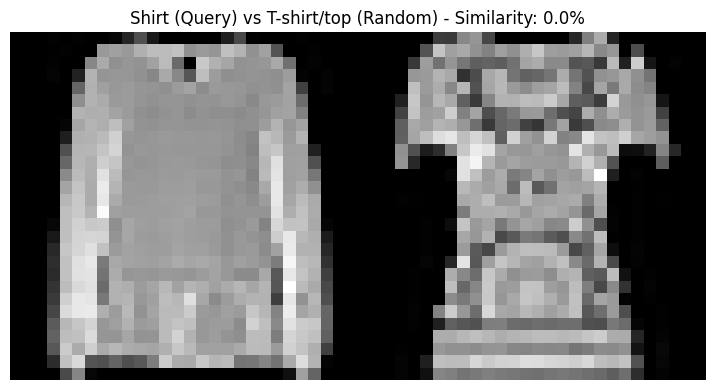

Sample 5: T-shirt/top - Similarity Score: 0.0%


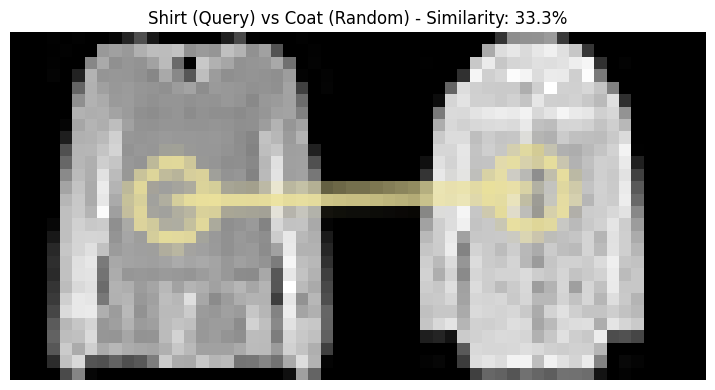

Sample 6: Coat - Similarity Score: 33.3%


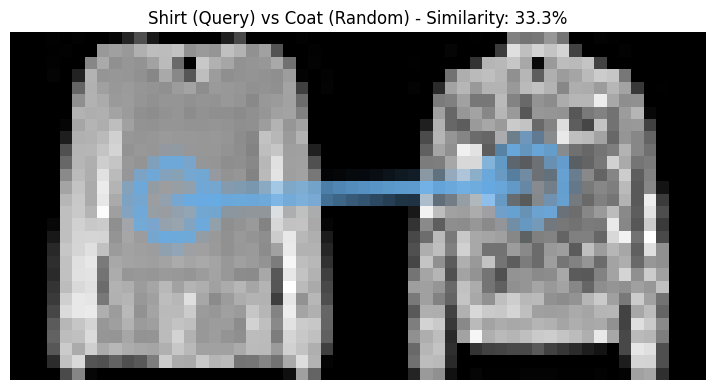

Sample 7: Coat - Similarity Score: 33.3%


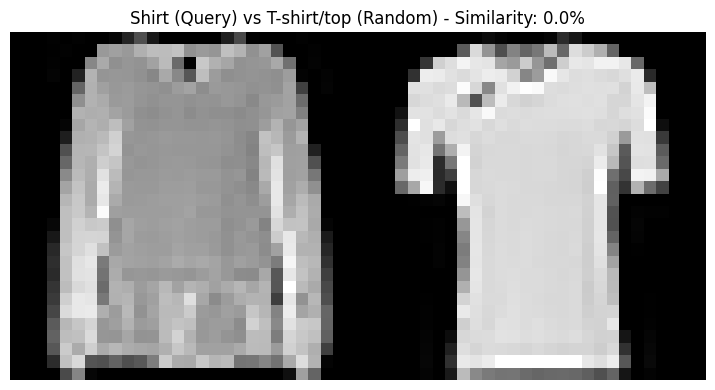

Sample 8: T-shirt/top - Similarity Score: 0.0%


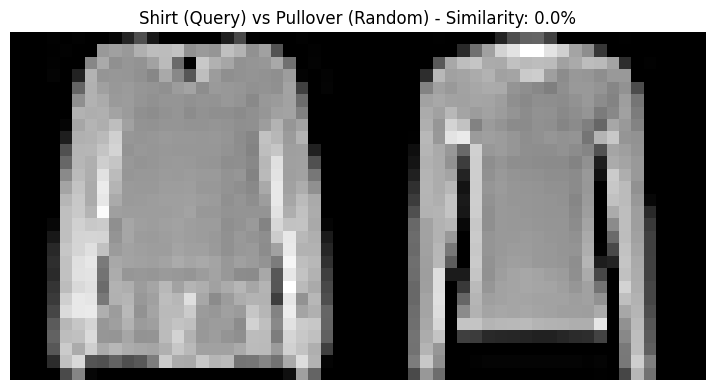

Sample 9: Pullover - Similarity Score: 0.0%


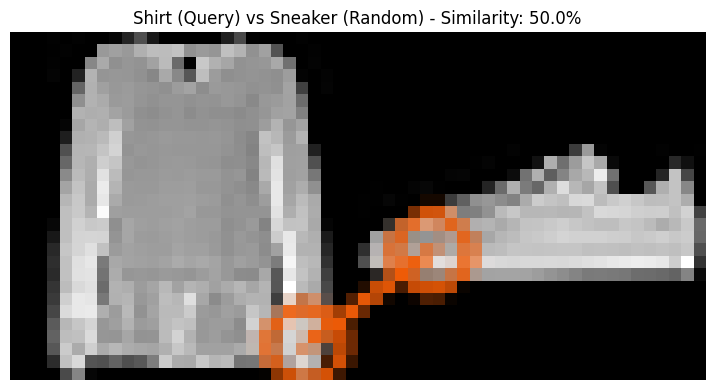

Sample 10: Sneaker - Similarity Score: 50.0%
--------------------------------------------------

Comparing Sneaker with random samples:


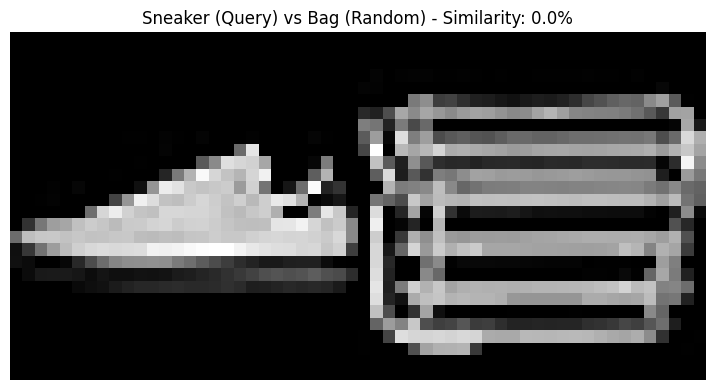

Sample 1: Bag - Similarity Score: 0.0%


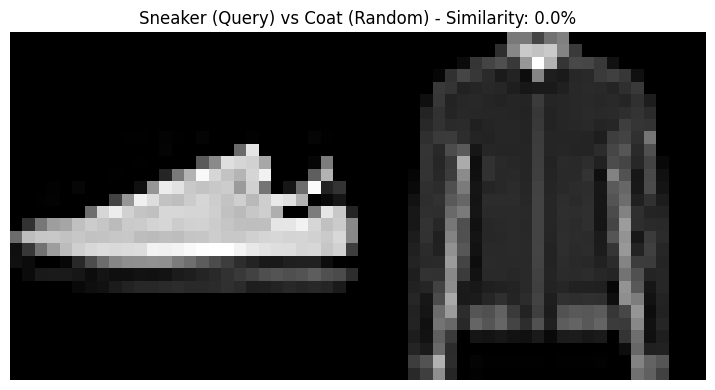

Sample 2: Coat - Similarity Score: 0.0%


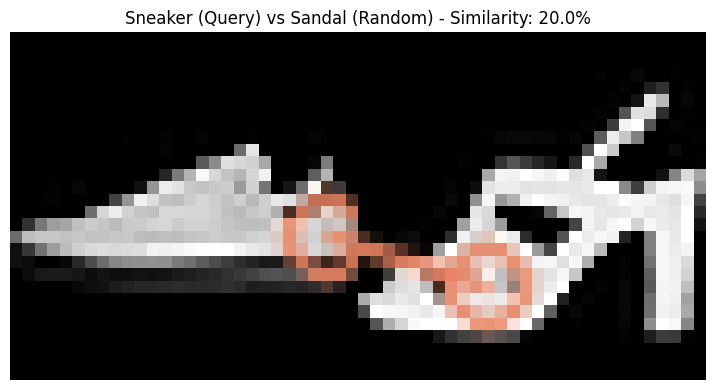

Sample 3: Sandal - Similarity Score: 20.0%


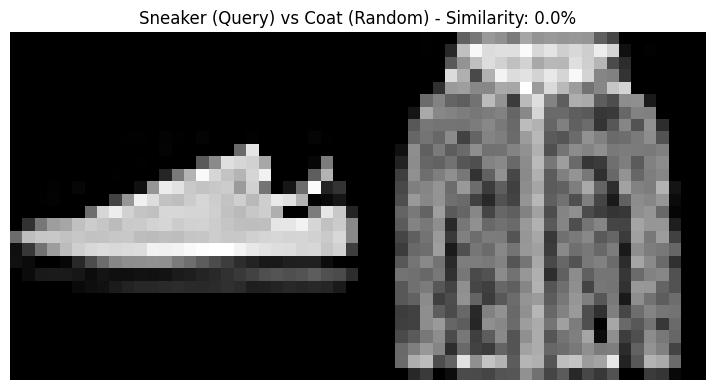

Sample 4: Coat - Similarity Score: 0.0%


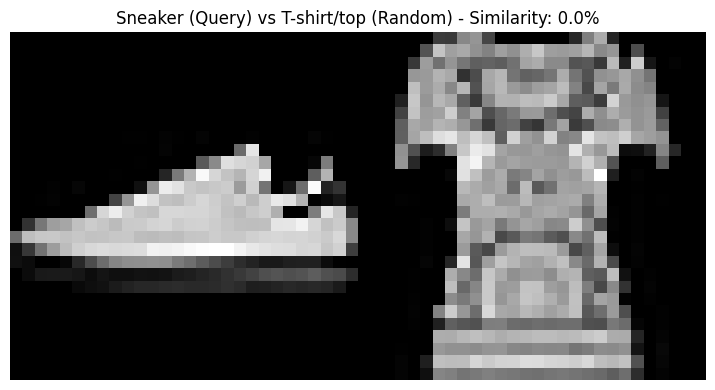

Sample 5: T-shirt/top - Similarity Score: 0.0%


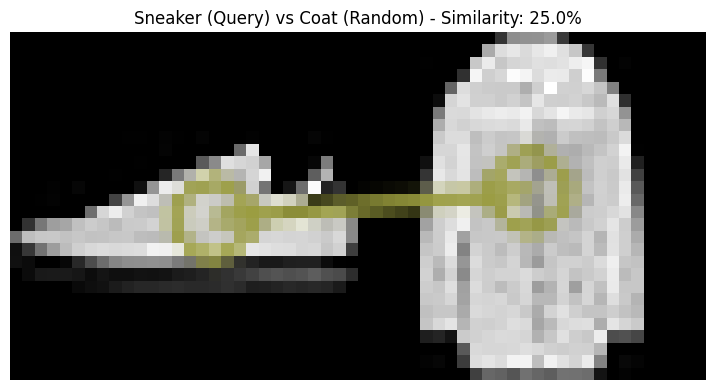

Sample 6: Coat - Similarity Score: 25.0%


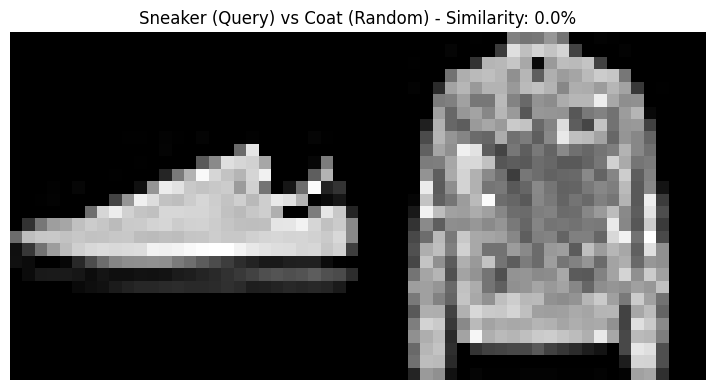

Sample 7: Coat - Similarity Score: 0.0%


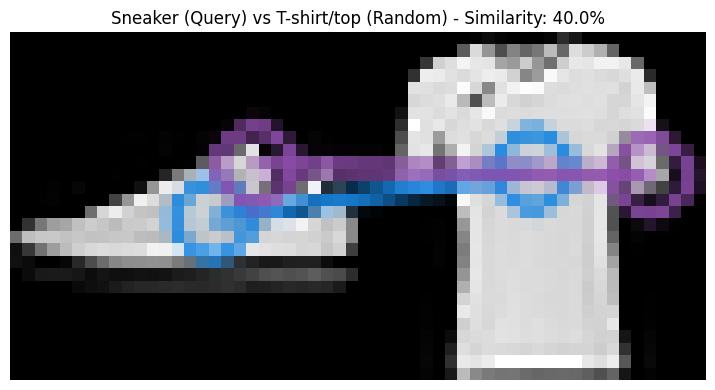

Sample 8: T-shirt/top - Similarity Score: 40.0%


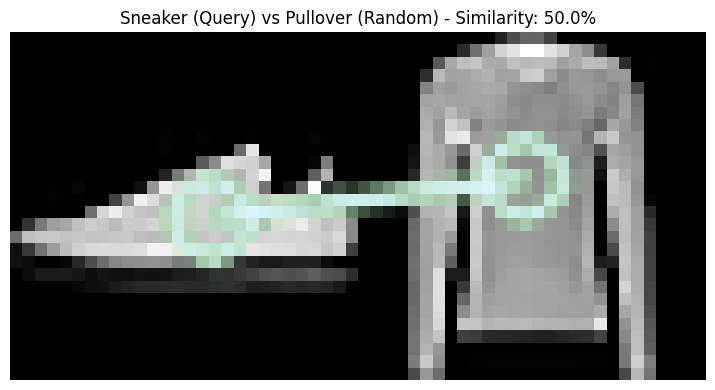

Sample 9: Pullover - Similarity Score: 50.0%


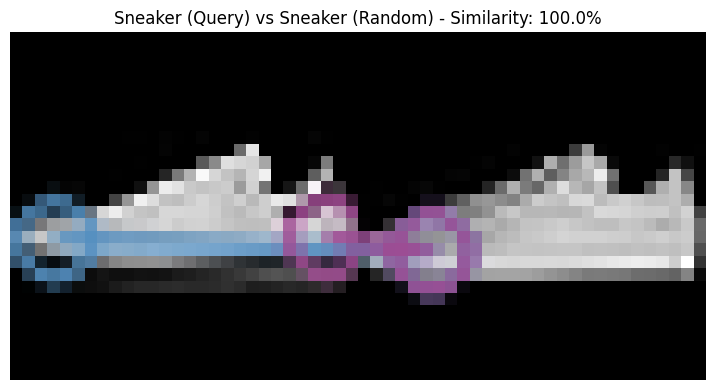

Sample 10: Sneaker - Similarity Score: 100.0%
--------------------------------------------------

Comparing Bag with random samples:


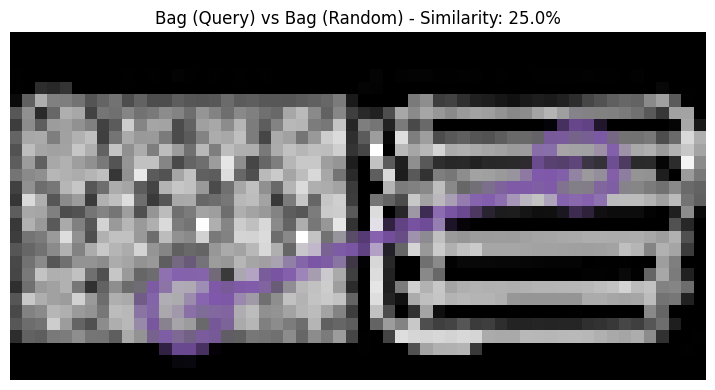

Sample 1: Bag - Similarity Score: 25.0%


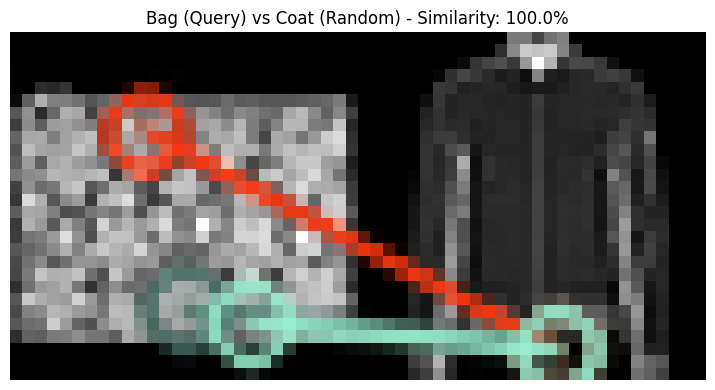

Sample 2: Coat - Similarity Score: 100.0%


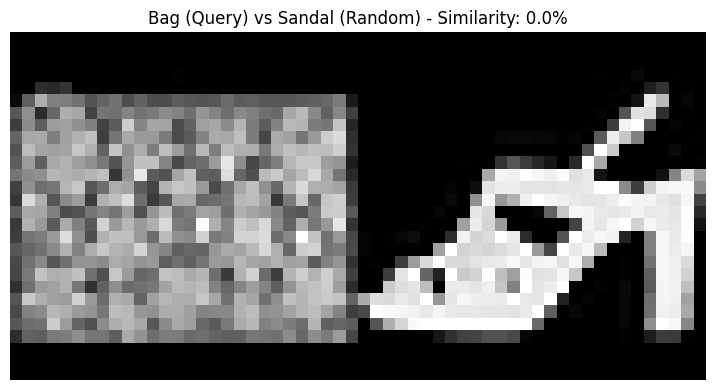

Sample 3: Sandal - Similarity Score: 0.0%


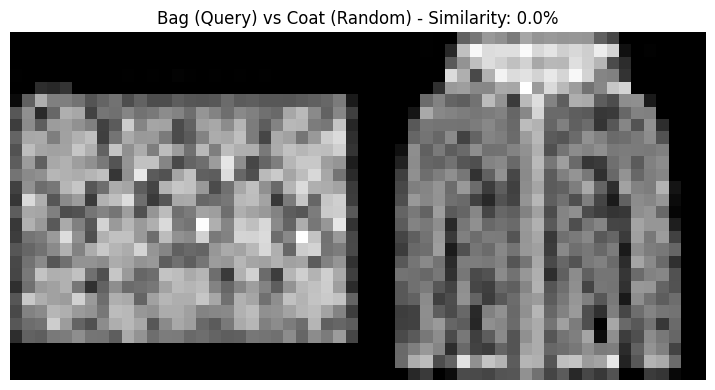

Sample 4: Coat - Similarity Score: 0.0%


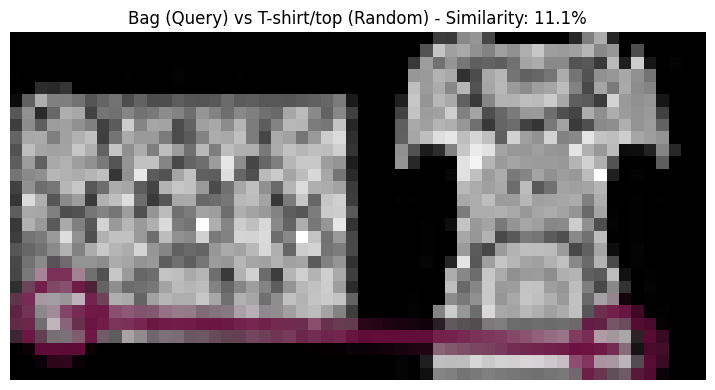

Sample 5: T-shirt/top - Similarity Score: 11.1%


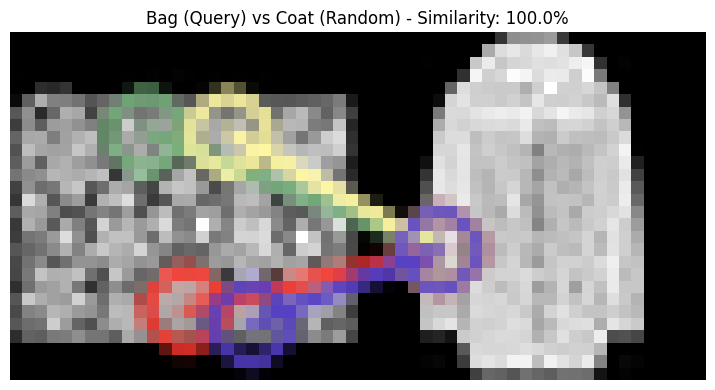

Sample 6: Coat - Similarity Score: 100.0%


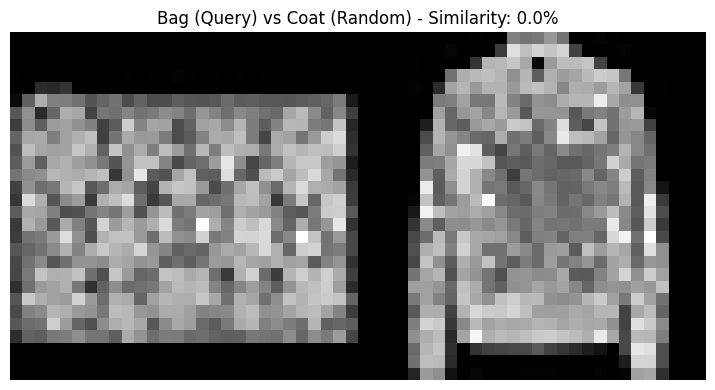

Sample 7: Coat - Similarity Score: 0.0%


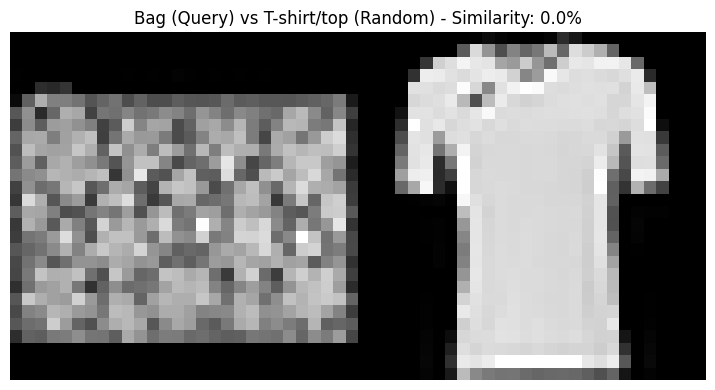

Sample 8: T-shirt/top - Similarity Score: 0.0%


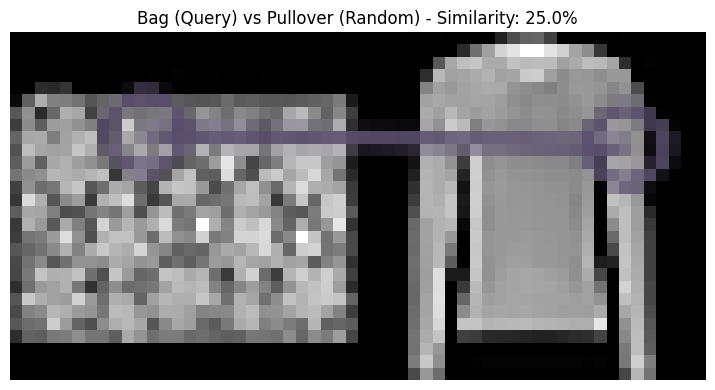

Sample 9: Pullover - Similarity Score: 25.0%


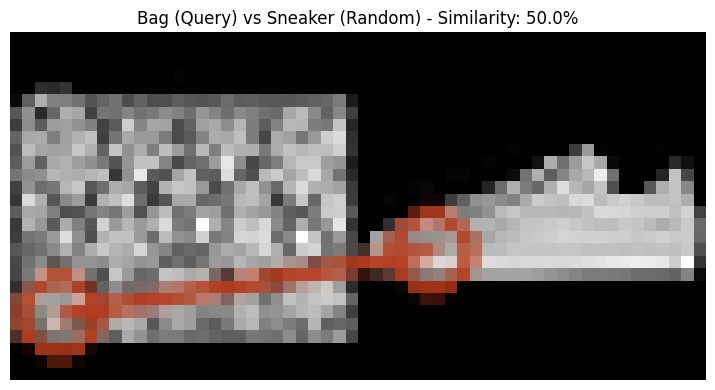

Sample 10: Sneaker - Similarity Score: 50.0%
--------------------------------------------------

Comparing Ankle boot with random samples:


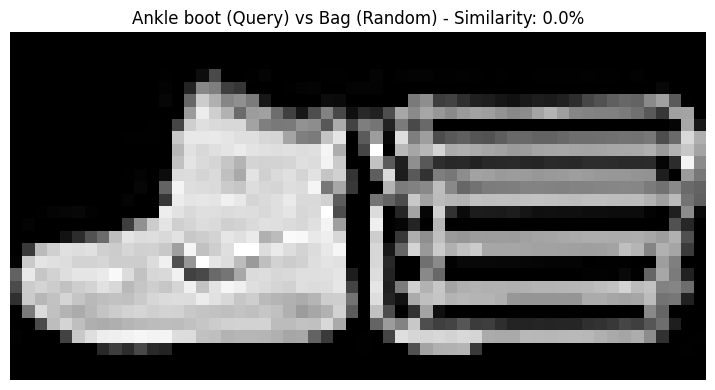

Sample 1: Bag - Similarity Score: 0.0%


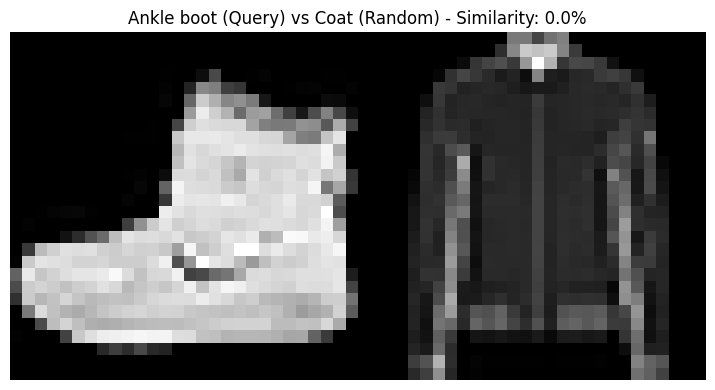

Sample 2: Coat - Similarity Score: 0.0%


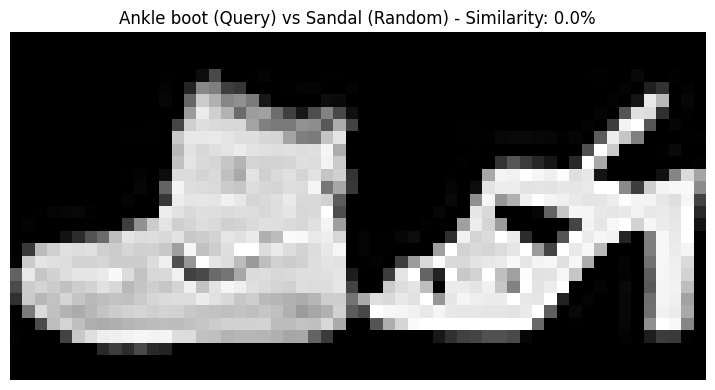

Sample 3: Sandal - Similarity Score: 0.0%


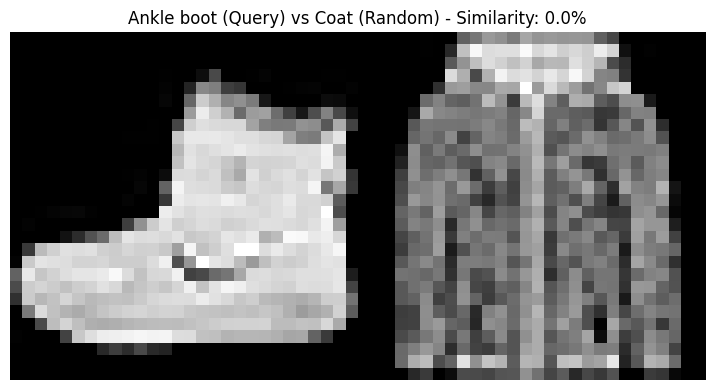

Sample 4: Coat - Similarity Score: 0.0%


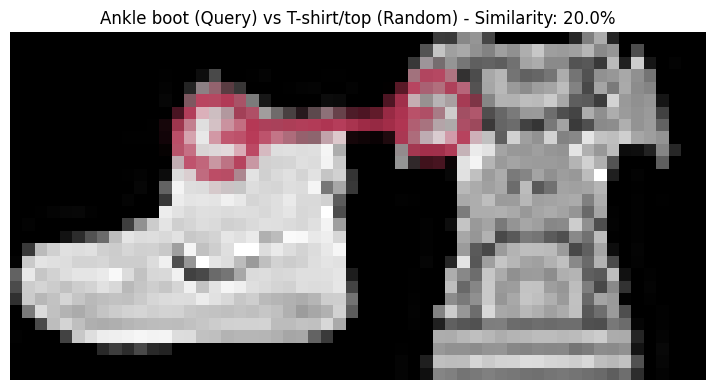

Sample 5: T-shirt/top - Similarity Score: 20.0%


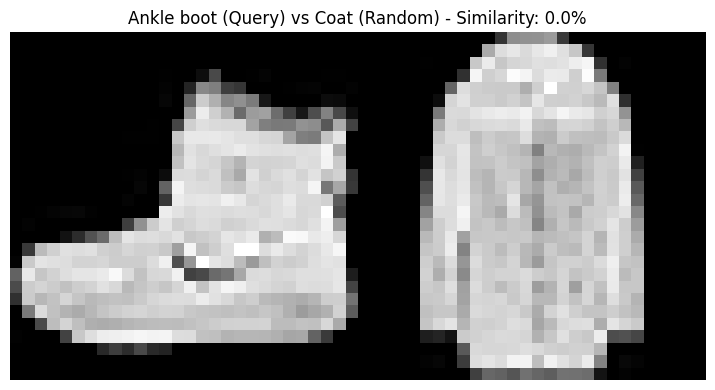

Sample 6: Coat - Similarity Score: 0.0%


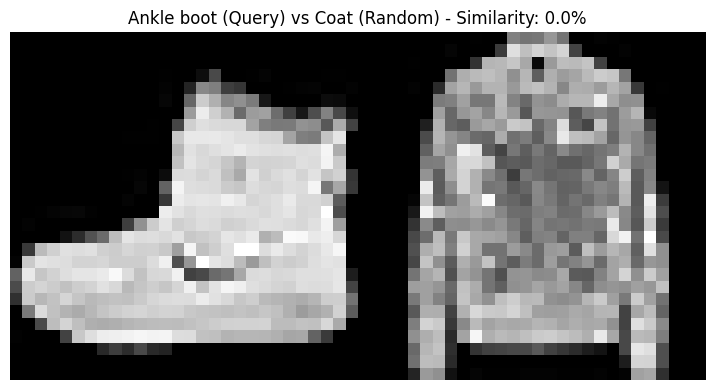

Sample 7: Coat - Similarity Score: 0.0%


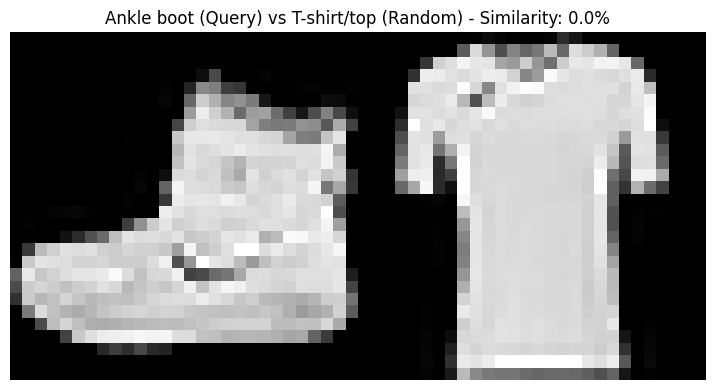

Sample 8: T-shirt/top - Similarity Score: 0.0%


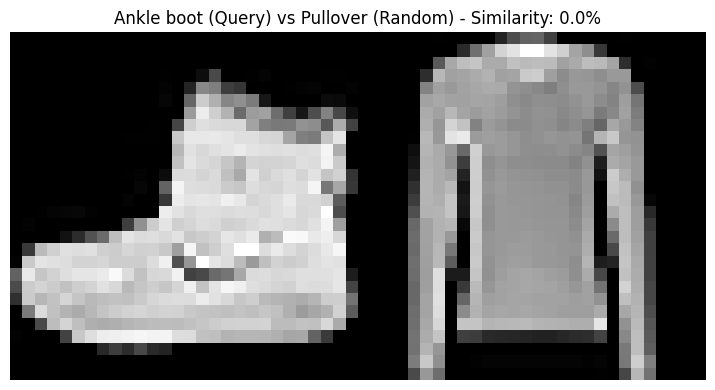

Sample 9: Pullover - Similarity Score: 0.0%


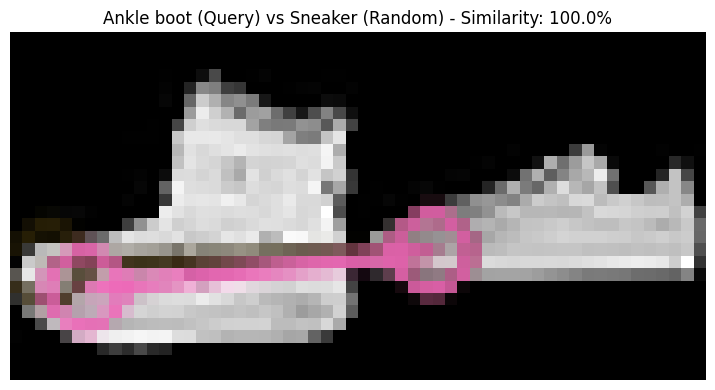

Sample 10: Sneaker - Similarity Score: 100.0%
--------------------------------------------------


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST
import random

# Keep existing helper functions
def imageResize(image, maxD=1024):
    height, width = image.shape[:2]
    aspectRatio = width / height
    if aspectRatio < 1:
        newSize = (int(maxD * aspectRatio), maxD)
    else:
        newSize = (maxD, int(maxD / aspectRatio))
    return cv2.resize(image, newSize)

sift = cv2.SIFT_create()

def computeSIFT(image):
    return sift.detectAndCompute(image, None)

def calculateMatches(des1, des2):
    if des1 is None or des2 is None:
        return []
    try:
        bf = cv2.BFMatcher()
        matches = bf.knnMatch(des1, des2, k=2)
        good_matches = []
        for match in matches:
            if len(match) < 2:
                continue
            m, n = match
            if m.distance < 0.7 * n.distance:
                good_matches.append(m)
        return good_matches
    except:
        return []

def calculateScore(matches, keypoints1, keypoints2):
    if not keypoints1 or not keypoints2:
        return 0
    return 100 * (len(matches) / min(len(keypoints1), len(keypoints2)))

def plotMatches(image1, image2, keypoints1, keypoints2, matches, title1="Query Image", title2="Test Image", score=None):
    matchPlot = cv2.drawMatches(
        image1, keypoints1, image2, keypoints2, matches[:30], None,
        flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )
    plt.figure(figsize=(12, 4))
    plt.imshow(matchPlot, cmap="gray")
    if score is not None:
        plt.title(f"{title1} vs {title2} - Similarity: {score:.1f}%")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def compare_class_with_random_samples(n_random_samples=10):
    """Compare one image from each class with random samples."""

    # Fashion MNIST class names
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

    # Load dataset
    transform = transforms.ToTensor()
    dataset = FashionMNIST(root="./data", train=True, download=True, transform=transform)

    # Get one representative image from each class
    class_representatives = {}
    for class_idx in range(10):
        # Find first image of this class
        for img, label in dataset:
            if label == class_idx:
                class_representatives[class_idx] = (img.squeeze().numpy() * 255).astype("uint8")
                break

    # Get random samples
    random_samples = []
    random_labels = []
    for _ in range(n_random_samples):
        idx = random.randint(0, len(dataset)-1)
        img, label = dataset[idx]
        random_samples.append((img.squeeze().numpy() * 255).astype("uint8"))
        random_labels.append(label)

    # Compare each class representative with random samples
    for class_idx, class_img in class_representatives.items():
        print(f"\nComparing {class_names[class_idx]} with random samples:")

        # Compute SIFT for class image
        kp1, des1 = computeSIFT(class_img)

        # Compare with each random sample
        for i, (test_img, test_label) in enumerate(zip(random_samples, random_labels)):
            # Compute SIFT for test image
            kp2, des2 = computeSIFT(test_img)

            # Calculate matches and similarity score
            matches = calculateMatches(des1, des2)
            score = calculateScore(matches, kp1, kp2)

            # Plot matches
            plotMatches(class_img, test_img, kp1, kp2, matches,
                       title1=f"{class_names[class_idx]} (Query)",
                       title2=f"{class_names[test_label]} (Random)",
                       score=score)

            print(f"Sample {i+1}: {class_names[test_label]} - Similarity Score: {score:.1f}%")

        # Add a separator between classes
        print("-" * 50)

# Run the comparison
if __name__ == "__main__":
    compare_class_with_random_samples(n_random_samples=10)